In [2875]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_roc_curve

In [2641]:
df = pd.read_csv('travel insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


# Data Exploration

In [2642]:
df.shape

(63326, 11)

In [2643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


## Missing Data

In [2644]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

> 70% of Gender is missing, so drop.

In [2645]:
df.drop(['Gender'], axis=1, inplace= True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


## Transform high unique value columns

In [2646]:
t1 = []
for col in df.columns:
    t1.append( (col, df[col].nunique() ) )
t1

[('Agency', 16),
 ('Agency Type', 2),
 ('Distribution Channel', 2),
 ('Product Name', 26),
 ('Claim', 2),
 ('Duration', 455),
 ('Destination', 149),
 ('Net Sales', 1139),
 ('Commision (in value)', 1035),
 ('Age', 89)]

> Destination has high unique value, might need to check the plot

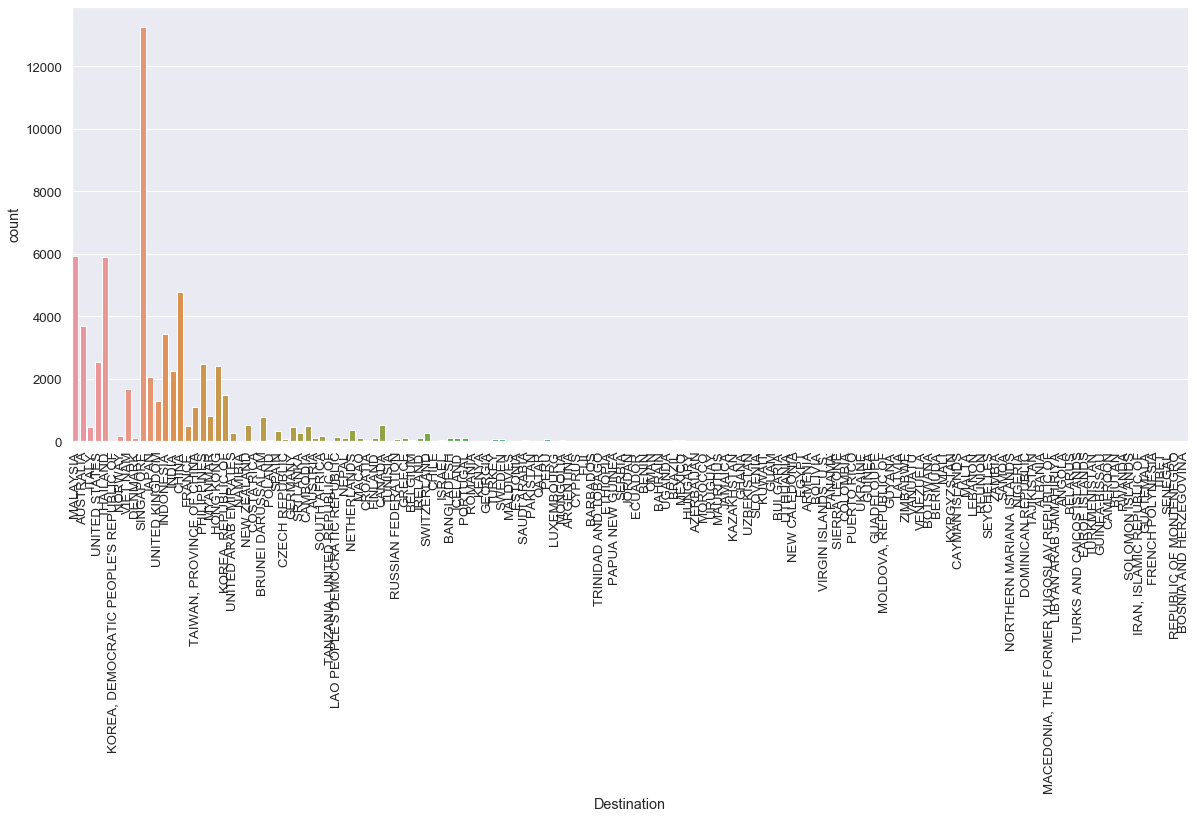

In [2647]:
plt.figure(figsize=(20,8))
sns.countplot(df['Destination'])
plt.xticks(rotation=90)
plt.show()

In [2648]:
print('value range', (df['Destination'].value_counts().min()), '-' ,df['Destination'].value_counts().max())

value range 1 - 13255


In [2649]:
Frequency = df.Destination.value_counts().to_frame().reset_index().rename(columns={'index':'Destination', 'Destination':'Frequency'})
Frequency

,Destination,Frequency
0,SINGAPORE,13255
1,MALAYSIA,5930
2,THAILAND,5894
3,CHINA,4796
4,AUSTRALIA,3694
...,...,...
144,SEYCHELLES,1
145,REPUBLIC OF MONTENEGRO,1
146,BOSNIA AND HERZEGOVINA,1
147,SENEGAL,1


In [2650]:
df = df.merge(Frequency, on='Destination')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Frequency
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,5930
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,5930
2,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,47,5930
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,5,MALAYSIA,-39.6,23.76,64,5930
4,JZI,Airlines,Online,Basic Plan,No,3,MALAYSIA,-18.0,6.30,47,5930


In [2651]:
df_1 = df[df['Claim']=='Yes']
df_0 = df[df['Claim']=='No']

Text(0.5, 1.0, 'Frequency')

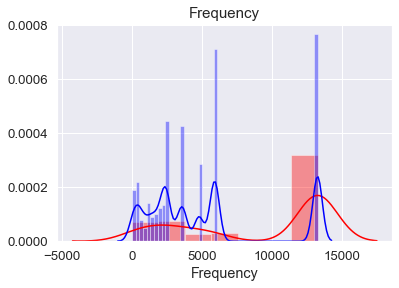

In [2652]:
sns.distplot(df_1['Frequency'], norm_hist=True, color = 'red')
sns.distplot(df_0['Frequency'], norm_hist=True, color = 'blue')
plt.title('Frequency',fontsize=15)

In [2653]:
Q1 = df['Frequency'].quantile(0.25)
Q2 = df['Frequency'].quantile(0.5)
Q3 = df['Frequency'].quantile(0.75)

In [2654]:
Frequency2 = []
for i in df['Frequency']:
    if i <= Q1:
        x = 'Very Low'
    elif Q1 < i & i <= Q2:
        x = 'Low'
    elif Q2 < i & i <= Q3:
        x = 'High'
    else:
        x = 'Very High'
    Frequency2.append(x)

In [2655]:
df['Frequency2'] = Frequency2
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Frequency,Frequency2
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,5930,High
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,5930,High
2,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,47,5930,High
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,5,MALAYSIA,-39.6,23.76,64,5930,High
4,JZI,Airlines,Online,Basic Plan,No,3,MALAYSIA,-18.0,6.30,47,5930,High


In [2656]:
df.drop(['Destination', 'Frequency'], axis=1,inplace=True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Frequency2
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,-29.0,9.57,81,High
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,-29.0,9.57,71,High
2,JZI,Airlines,Online,Basic Plan,No,1,-18.0,6.30,47,High
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,5,-39.6,23.76,64,High
4,JZI,Airlines,Online,Basic Plan,No,3,-18.0,6.30,47,High


## Analyse by class

In [2657]:
round(df.groupby('Claim').mean())

,Duration,Net Sales,Commision (in value),Age
Claim,,,,
No,48.0,40.0,10.0,40.0
Yes,111.0,94.0,26.0,39.0


> Claim has higher Duration, Net Sales, Commision, and Frequency <br>
> Age is younger

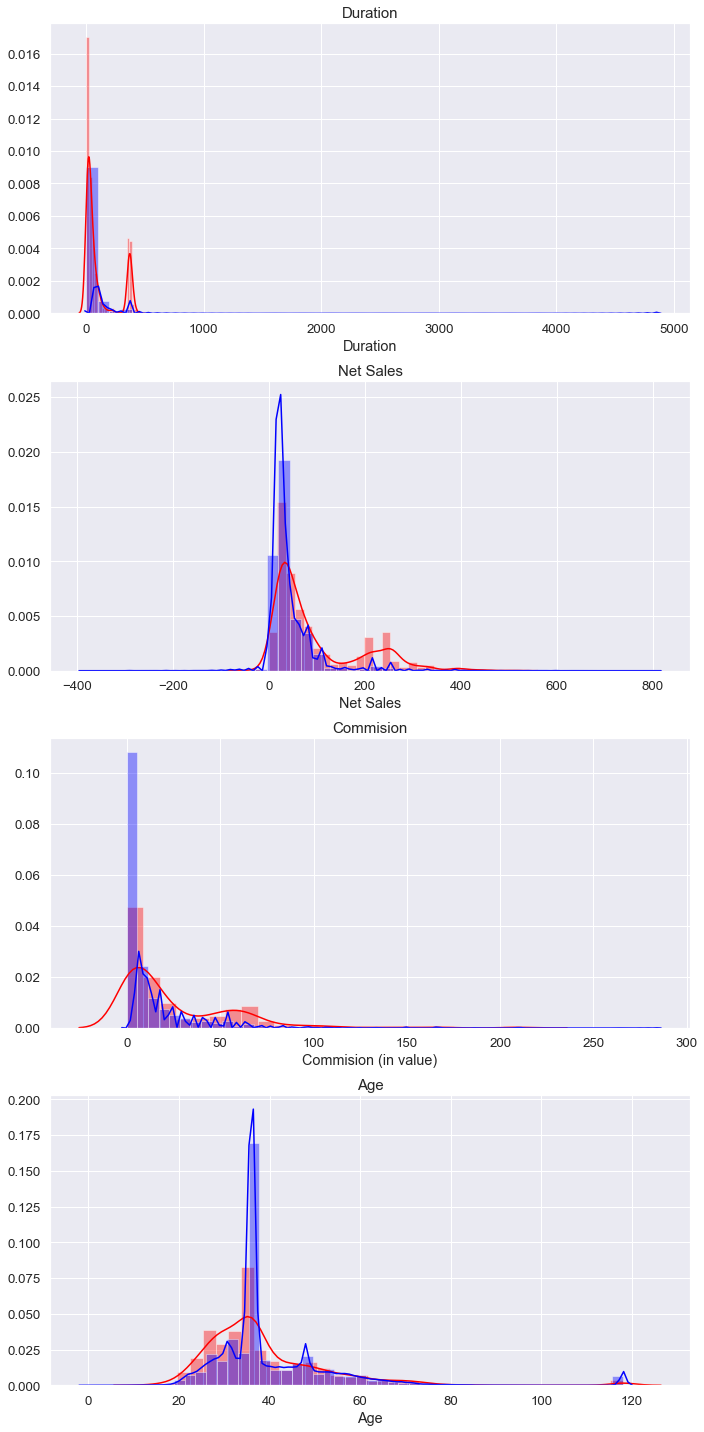

In [2658]:
plt.subplots(4,1, figsize=(10,20))

plt.subplot(4,1,1)
sns.distplot(df_1['Duration'], norm_hist=True, color = 'red')
sns.distplot(df_0['Duration'], norm_hist=True, color = 'blue')
plt.title('Duration',fontsize=15)

plt.subplot(4,1,2)
sns.distplot(df_1['Net Sales'], norm_hist=True, color = 'red')
sns.distplot(df_0['Net Sales'], norm_hist=True, color = 'blue')
plt.title('Net Sales',fontsize=15)

plt.subplot(4,1,3)
sns.distplot(df_1['Commision (in value)'], norm_hist=True, color = 'red')
sns.distplot(df_0['Commision (in value)'], norm_hist=True, color = 'blue')
plt.title('Commision',fontsize=15)

plt.subplot(4,1,4)
sns.distplot(df_1['Age'], norm_hist=True, color = 'red')
sns.distplot(df_0['Age'], norm_hist=True, color = 'blue')
plt.title('Age',fontsize=15)

plt.tight_layout()

In [2659]:
## Check Coefficient of Variation

In [2660]:
des1 = df_1.describe()
des1

,Duration,Net Sales,Commision (in value),Age,Frequency
count,927.000000,927.000000,927.000000,927.000000,927.000000
mean,110.788565,94.374423,25.846419,38.634304,9161.207120
std,141.375274,93.174871,32.482286,14.116647,5224.090863
min,1.000000,-37.000000,0.000000,14.000000,7.000000
25%,15.000000,29.000000,4.250000,30.000000,3694.000000
50%,38.000000,53.250000,12.250000,36.000000,13255.000000
75%,120.000000,118.800000,46.960000,44.000000,13255.000000
max,431.000000,507.000000,210.210000,118.000000,13255.000000


In [2661]:
CoefVar1 =  des1.loc['std',:] / des1.loc['mean',:]
CoefVar1

Duration                1.276082
Net Sales               0.987289
Commision (in value)    1.256742
Age                     0.365392
Frequency               0.570240
dtype: float64

In [2662]:
des0 = df_0.describe()
des0

,Duration,Net Sales,Commision (in value),Age,Frequency
count,62399.000000,62399.000000,62399.000000,62399.000000,62399.000000
mean,48.403853,39.904660,9.571755,39.989824,5203.933220
std,100.806118,47.424392,19.455216,14.014678,4440.227492
min,-2.000000,-389.000000,0.000000,0.000000,1.000000
25%,9.000000,18.000000,0.000000,35.000000,2061.000000
50%,22.000000,26.000000,0.000000,36.000000,3694.000000
75%,52.000000,47.000000,10.640000,43.000000,5930.000000
max,4881.000000,810.000000,283.500000,118.000000,13255.000000


In [2663]:
CoefVar0 =  des0.loc['std',:] / des0.loc['mean',:]
CoefVar0

Duration                2.082605
Net Sales               1.188442
Commision (in value)    2.032565
Age                     0.350456
Frequency               0.853245
dtype: float64

> Duration and Commision have high variance. <br>

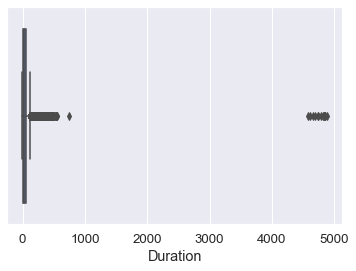

In [2664]:
sns.boxplot(x=df['Duration'])

> Remove above 1000

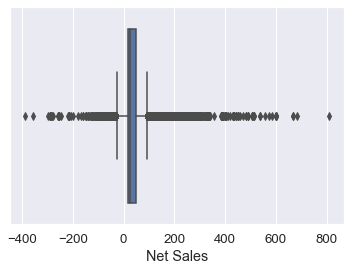

In [2665]:
sns.boxplot(x=df['Net Sales'])

> remove more than 400 or less than -200

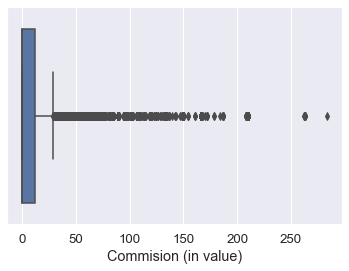

In [2666]:
sns.boxplot(x=df['Commision (in value)'])

> remove more than 250

In [2667]:
#fil1 = df['Duration'] < 1000
#fil2 = df['Net Sales'] > -200
#fil3 = df['Net Sales'] < 400
#fil4 = df['Duration'] < 250
#df.where(fil1&fil2&fil3&fil4, inplace=True)

In [2668]:
#des = df.describe()
#CoefVar =  des.loc['std',:] / des.loc['mean',:]
#CoefVar

Duration                1.129858
Net Sales               0.895641
Commision (in value)    1.886709
Age                     0.352135
dtype: float64

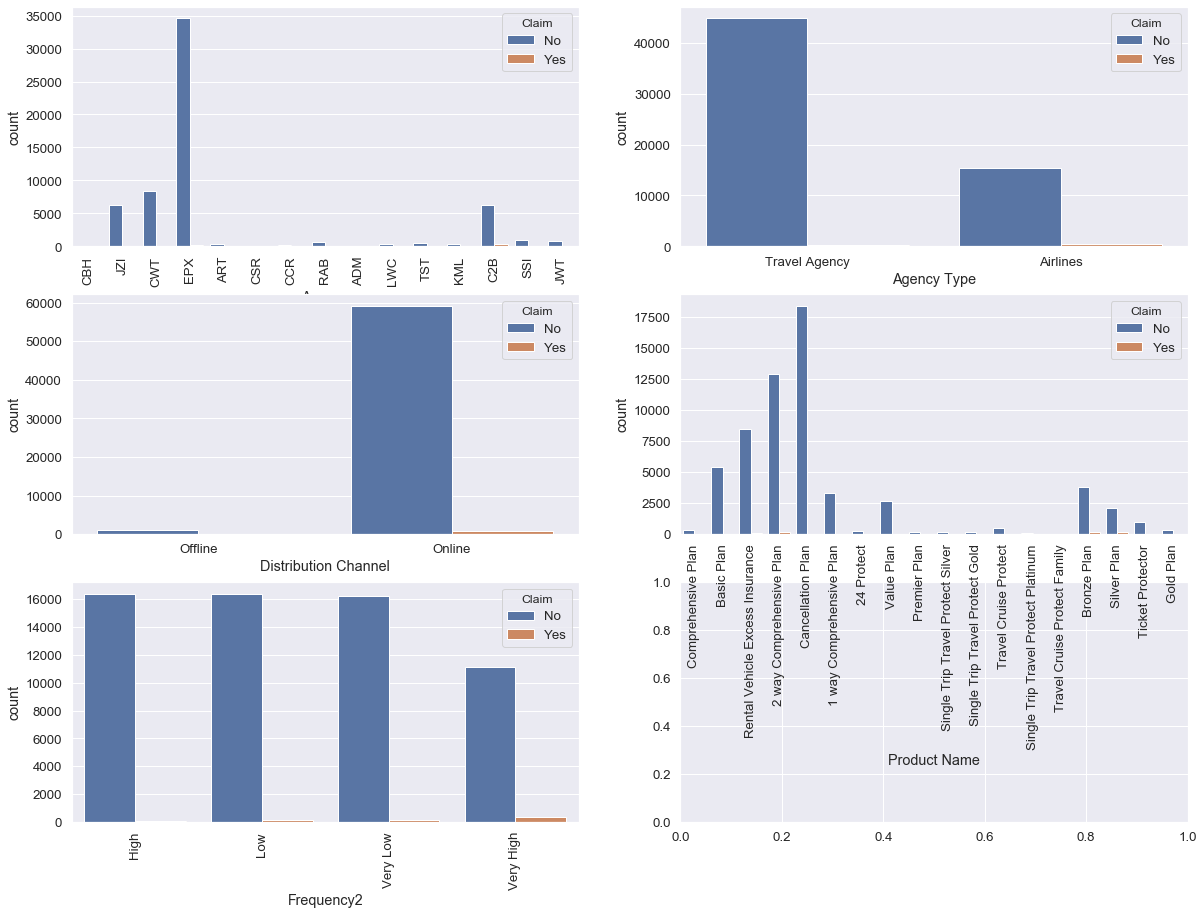

In [2669]:
sns.set(font_scale=1.2)
plt.subplots(3,2, figsize=(20,15))
plt.subplot(3,2,1)
sns.countplot(data=df, x='Agency', hue='Claim')
plt.xticks(rotation=90)
plt.subplot(3,2,2)
sns.countplot(data=df, x='Agency Type', hue='Claim')
plt.subplot(3,2,3)
sns.countplot(data=df, x='Distribution Channel', hue='Claim')
plt.subplot(3,2,4)
sns.countplot(data=df, x='Product Name', hue='Claim')
plt.xticks(rotation=90)
plt.subplot(3,2,5)
sns.countplot(data=df, x='Frequency2', hue='Claim')
plt.xticks(rotation=90)
plt.show()

> 1. Agency C2B has higher claims <br>
> 2. Airline receives claims than travel agency <br>
> 3. 2 way comprehensive plan, Bronze plan, Silver plan, Annual Silver plan have higher claims

### See the Net Sales by product

In [2670]:
net = df['Net Sales'].groupby(df['Product Name']).mean().to_frame(name = 'Avg Net Sales').reset_index()
net['Avg Net Sales'] = round(net['Avg Net Sales'] * 100)
net

,Product Name,Avg Net Sales
0,1 way Comprehensive Plan,2765.0
1,2 way Comprehensive Plan,4250.0
2,24 Protect,2278.0
3,Basic Plan,2648.0
4,Bronze Plan,3268.0
5,Cancellation Plan,2625.0
6,Comprehensive Plan,2882.0
7,Gold Plan,7125.0
8,Premier Plan,6404.0
9,Rental Vehicle Excess Insurance,4323.0


In [2671]:
a = df.groupby(['Product Name','Claim']).size().to_frame(name = 'Count').reset_index().rename(columns = {"Agency": "Count"})
a

,Product Name,Claim,Count
0,1 way Comprehensive Plan,No,3313
1,1 way Comprehensive Plan,Yes,9
2,2 way Comprehensive Plan,No,12920
3,2 way Comprehensive Plan,Yes,141
4,24 Protect,No,244
5,Basic Plan,No,5435
6,Basic Plan,Yes,23
7,Bronze Plan,No,3827
8,Bronze Plan,Yes,210
9,Cancellation Plan,No,18409


In [2672]:
for i in range(a.shape[0]):
    if 'No' in a.loc[i, 'Claim']:
        a.loc[i, 'Count'] = round((a.loc[i, 'Count'] / df[df['Claim']=='No']['Product Name'].count()) * 100)
    else:
        a.loc[i, 'Count'] = round((a.loc[i, 'Count'] / df[df['Claim']=='Yes']['Product Name'].count()) * 100)

In [2673]:
a.sort_values(by=['Count'], ascending=False)

,Product Name,Claim,Count
9,Cancellation Plan,No,31.0
8,Bronze Plan,Yes,29.0
2,2 way Comprehensive Plan,No,21.0
3,2 way Comprehensive Plan,Yes,19.0
20,Silver Plan,Yes,19.0
17,Rental Vehicle Excess Insurance,No,14.0
18,Rental Vehicle Excess Insurance,Yes,12.0
5,Basic Plan,No,9.0
10,Cancellation Plan,Yes,6.0
0,1 way Comprehensive Plan,No,6.0


In [2674]:
b = net.merge(a, on='Product Name')
b

,Product Name,Avg Net Sales,Claim,Count
0,1 way Comprehensive Plan,2765.0,No,6.0
1,1 way Comprehensive Plan,2765.0,Yes,1.0
2,2 way Comprehensive Plan,4250.0,No,21.0
3,2 way Comprehensive Plan,4250.0,Yes,19.0
4,24 Protect,2278.0,No,0.0
5,Basic Plan,2648.0,No,9.0
6,Basic Plan,2648.0,Yes,3.0
7,Bronze Plan,3268.0,No,6.0
8,Bronze Plan,3268.0,Yes,29.0
9,Cancellation Plan,2625.0,No,31.0


In [2675]:
b.sort_values(by=['Avg Net Sales'], ascending=False)

,Product Name,Avg Net Sales,Claim,Count
13,Gold Plan,7125.0,No,1.0
14,Gold Plan,7125.0,Yes,2.0
16,Premier Plan,6404.0,Yes,0.0
15,Premier Plan,6404.0,No,0.0
20,Silver Plan,4848.0,Yes,19.0
19,Silver Plan,4848.0,No,3.0
33,Value Plan,4763.0,Yes,3.0
32,Value Plan,4763.0,No,4.0
24,Single Trip Travel Protect Platinum,4426.0,Yes,1.0
23,Single Trip Travel Protect Platinum,4426.0,No,0.0


## Correlation

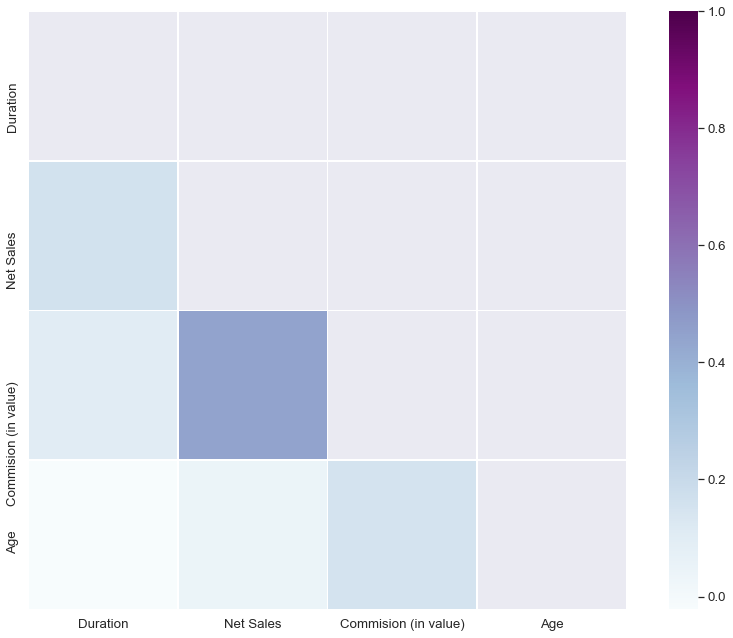

In [2676]:
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 11))

sns.heatmap(corr, mask = mask, square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

## Balance data

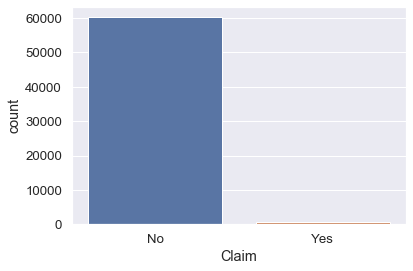

In [2677]:
sns.countplot(df['Claim'])

> target variable is imbalanced so need to up/down sample

In [2678]:
claim = list(map(lambda x : 1 if (x == 'Yes') else 0, df['Claim']))

In [3169]:
df['Claim'] = claim
df[df['Claim']==1]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Frequency2
1894,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,9.0,39.6,23.76,44.0,High
1895,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,19.0,39.6,23.76,29.0,High
2393,EPX,Travel Agency,Offline,2 way Comprehensive Plan,1,10.0,20.0,0.00,118.0,High
2469,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,10.0,49.5,29.70,31.0,High
2547,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,24.0,39.6,23.76,31.0,High
...,...,...,...,...,...,...,...,...,...,...
62197,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,85.0,59.4,35.64,61.0,Very Low
62207,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,36.0,69.3,41.58,28.0,Very Low
62449,EPX,Travel Agency,Online,2 way Comprehensive Plan,1,25.0,79.0,0.00,36.0,Very Low
62834,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,30.0,79.2,47.52,30.0,Very Low


In [3170]:
claim = df['Claim'].values
y = np.array(claim.copy())
X = df.drop(columns=['Claim']).values

In [3171]:
nb_class = len(set(y))
nb_class

# create empty arrays for both classes
id_Train = np.array([None]*nb_class)
id_Test = np.array([None]*nb_class)

In [3172]:
for i in range(nb_class):
    id_i = np.where(y==i)[0]
    id_i_train, id_i_test = train_test_split(id_i, test_size=0.2)
    id_Train[i] = id_i_train
    id_Test[i] = id_i_test

In [3173]:
# currently there are 2 rows so concatenate to 1 row
id_Train = np.concatenate(id_Train)
id_Test = np.concatenate(id_Test)

X_train = X[id_Train]
X_test = X[id_Test]
y_train = y[id_Train]
y_test = y[id_Test]

In [3174]:
id_toTrain = np.array([np.where(y_train==i)[0] for i in range(nb_class)])
size_max = [len(id_toTrain[i]) for i in range(nb_class)]

In [3175]:
size_max[1]

579

In [3176]:
print("Before Resampling", size_max)

blc = 600
for i in range(len(size_max)):
    # Downsample
    if size_max[i] > blc:
        size_max[i] = int(blc*(np.log10(size_max[i]/blc)+70))
    # Upsample
    else:
        size_max[i] = int(blc/(np.log10(blc/size_max[i])))
        
print("After Resampling", size_max)

Before Resampling [50081, 579]
After Resampling [43152, 38778]


In [3177]:
for i in range(nb_class):
    if len(id_toTrain[i]) > size_max[i]:
        id_toTrain[i], tmp = train_test_split(id_toTrain[i], test_size=1-size_max[i]/len(id_toTrain[i]))
    else:
        id_toTrain[i] = np.concatenate((id_toTrain[i], 
                                        id_toTrain[i][np.random.randint(len(id_toTrain[i]), 
                                                                                       size=int(size_max[i]-len(id_toTrain[i])))]))

In [3178]:
id_toTrain = np.concatenate(id_toTrain)
X_train = X_train[id_toTrain]
y_train = y_train[id_toTrain]
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 43152, 1: 38778})
Counter({0: 12521, 1: 145})


In [3179]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Frequency2'],
      dtype='object')

In [3180]:
X_train = pd.DataFrame(X_train, columns=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Frequency2'])
X_test = pd.DataFrame(X_test, columns=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Frequency2'])

In [3181]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [3182]:
y_train

array([1, 0, 0, ..., 0, 1, 1])

In [3183]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81930 entries, 69774 to 64632
Data columns (total 9 columns):
Agency                  80250 non-null object
Agency Type             80250 non-null object
Distribution Channel    80250 non-null object
Product Name            80250 non-null object
Duration                80250 non-null object
Net Sales               80250 non-null object
Commision (in value)    80250 non-null object
Age                     80250 non-null object
Frequency2              80250 non-null object
dtypes: object(9)
memory usage: 6.3+ MB


In [3184]:
num_cols = ['Duration','Net Sales','Age']
X_train[num_cols] = X_train[num_cols].apply(pd.to_numeric)
X_test[num_cols] = X_test[num_cols].apply(pd.to_numeric)

In [3185]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

In [3203]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81930 entries, 69774 to 64632
Data columns (total 9 columns):
Agency                  80250 non-null object
Agency Type             80250 non-null object
Distribution Channel    80250 non-null object
Product Name            80250 non-null object
Duration                80250 non-null float64
Net Sales               80250 non-null float64
Commision (in value)    80250 non-null object
Age                     80250 non-null float64
Frequency2              80250 non-null object
dtypes: float64(3), object(6)
memory usage: 6.3+ MB


In [3205]:
X_train_dummy = pd.get_dummies(X_train)
X_test_dummy = pd.get_dummies(X_test)

In [3206]:
X_train_dummy = X_train_dummy.fillna(0)
X_test_dummy = X_test_dummy.fillna(0)
X_train_dummy.columns

Index(['Duration', 'Net Sales', 'Age', 'Agency_ADM', 'Agency_ART',
       'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR', 'Agency_CWT',
       ...
       'Commision (in value)_154.44', 'Commision (in value)_154.5',
       'Commision (in value)_160.38', 'Commision (in value)_166.32',
       'Commision (in value)_172.26', 'Commision (in value)_184.14',
       'Frequency2_High', 'Frequency2_Low', 'Frequency2_Very High',
       'Frequency2_Very Low'],
      dtype='object', length=878)

In [3207]:
X_train_dummy.shape

(81930, 878)

In [3208]:
X_train_dummy = pd.DataFrame(X_train_dummy, columns=['Duration', 'Net Sales', 'Age', 'Agency_ADM', 'Agency_ART',
       'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR', 'Agency_CWT',
       'Agency_EPX', 'Agency_JWT', 'Agency_JZI', 'Agency_KML', 'Agency_LWC',
       'Agency_RAB', 'Agency_SSI', 'Agency_TST', 'Agency_TTW',
       'Agency Type_Airlines', 'Agency Type_Travel Agency',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect',
       'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan',
       'Product Name_Annual Travel Protect Gold',
       'Product Name_Annual Travel Protect Platinum',
       'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Child Comprehensive Plan',
       'Product Name_Comprehensive Plan', 'Product Name_Gold Plan',
       'Product Name_Individual Comprehensive Plan',
       'Product Name_Premier Plan',
       'Product Name_Rental Vehicle Excess Insurance',
       'Product Name_Silver Plan',
       'Product Name_Single Trip Travel Protect Gold',
       'Product Name_Single Trip Travel Protect Platinum',
       'Product Name_Single Trip Travel Protect Silver',
       'Product Name_Spouse or Parents Comprehensive Plan',
       'Product Name_Ticket Protector', 'Product Name_Travel Cruise Protect',
       'Product Name_Value Plan', 'Frequency2_High', 'Frequency2_Low',
       'Frequency2_Very High', 'Frequency2_Very Low'])
X_test_dummy = pd.DataFrame(X_test_dummy, columns=['Duration', 'Net Sales', 'Age', 'Agency_ADM', 'Agency_ART',
       'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR', 'Agency_CWT',
       'Agency_EPX', 'Agency_JWT', 'Agency_JZI', 'Agency_KML', 'Agency_LWC',
       'Agency_RAB', 'Agency_SSI', 'Agency_TST', 'Agency_TTW',
       'Agency Type_Airlines', 'Agency Type_Travel Agency',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect',
       'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan',
       'Product Name_Annual Travel Protect Gold',
       'Product Name_Annual Travel Protect Platinum',
       'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Child Comprehensive Plan',
       'Product Name_Comprehensive Plan', 'Product Name_Gold Plan',
       'Product Name_Individual Comprehensive Plan',
       'Product Name_Premier Plan',
       'Product Name_Rental Vehicle Excess Insurance',
       'Product Name_Silver Plan',
       'Product Name_Single Trip Travel Protect Gold',
       'Product Name_Single Trip Travel Protect Platinum',
       'Product Name_Single Trip Travel Protect Silver',
       'Product Name_Spouse or Parents Comprehensive Plan',
       'Product Name_Ticket Protector', 'Product Name_Travel Cruise Protect',
       'Product Name_Value Plan', 'Frequency2_High', 'Frequency2_Low',
       'Frequency2_Very High', 'Frequency2_Very Low'])

In [3209]:
X_train_dummy.head()

,Duration,Net Sales,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Frequency2_High,Frequency2_Low,Frequency2_Very High,Frequency2_Very Low
69774,11.0,69.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1
34072,117.0,178.2,51.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,1,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0,NaN,0,1,0,0,0,0,NaN,0,0,0,0,0,0,1
30195,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0
47685,71.0,33.5,28.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,1,0
69354,27.0,38.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0,1,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1


In [3210]:
X_train_dummy.dropna(axis=1, inplace=True)
X_test_dummy.dropna(axis=1, inplace=True)

In [3211]:
X_train_dummy

,Duration,Net Sales,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Frequency2_High,Frequency2_Low,Frequency2_Very High,Frequency2_Very Low
69774,11.0,69.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34072,117.0,178.2,51.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
30195,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47685,71.0,33.5,28.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
69354,27.0,38.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45557,7.0,20.0,38.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32492,150.0,112.0,28.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34801,26.0,93.6,62.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
61395,55.0,40.0,26.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Modelling

## Logistic Regression

In [3218]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_dummy, y_train)
pred_lr = lr.predict(X_test_dummy)

/Users/naitochieri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [3219]:
thresh = 0.5
pred_lr_proba = lr.predict_proba(X_test_dummy)[:,1]
pred_lr_proba

array([0.60842088, 0.51997127, 0.35516773, ..., 0.14733999, 0.79218824,
       0.91864922])

In [3220]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.80      0.88     12521
           1       0.04      0.66      0.07       145

    accuracy                           0.79     12666
   macro avg       0.52      0.73      0.48     12666
weighted avg       0.98      0.79      0.88     12666



In [3221]:
roc_auc_score(y_test, pred_lr)

0.7256774136691737

In [3222]:
lr.coef_

array([[ 0.00282929,  0.01309188,  0.00398212, -0.11289829, -0.11236811,
         1.61842953, -0.10697279,  0.08433342,  0.06515018, -0.11450996,
        -0.63277488, -0.33866855, -0.31577468,  0.3600544 ,  1.07606517,
        -0.43000565, -0.1975281 , -0.36861706,  0.22408444,  0.24983019,
         0.31144507,  0.16246956, -0.57711353,  0.62749323, -0.22761346,
        -0.31403271,  0.74334885, -0.68315458,  0.05930454,  0.0776937 ,
         0.18479215, -0.11450996,  0.79738698,  0.65133048,  0.15468928,
         0.27004542, -0.1975281 , -0.36749345, -0.60960059,  0.24053244,
         0.17225233, -0.31031578,  0.37144564]])

> Strong coefficient 1. Net Sales(+), Agency_C2B(+), Frequency(-), Product Name(-), Commision (+)

##  Xgboost

In [2843]:
from xgboost import XGBClassifier, plot_importance
xgb = XGBClassifier(max_declta_step=2,eta=0.1,objective='binary:logistic', max_depth=3, n_estimators=20,
                    reg_lambda=5, min_child_weight=5, reg_alpha=5,
                   grow_policy='lossguide', subsample=0.1)

In [2990]:
xgb.fit(X_train_dummy, y_train)
pred_xgb = xgb.predict(X_test_dummy)
thresh = 0.5
pred_xgb_proba = xgb.predict_proba(X_test_dummy)[:,1]
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     12521
           1       0.04      0.76      0.07       145

    accuracy                           0.77     12666
   macro avg       0.52      0.76      0.47     12666
weighted avg       0.99      0.77      0.86     12666



In [2991]:
confusion_matrix(y_test, pred_xgb, labels=[1, 0])

array([[ 110,   35],
       [2903, 9618]])

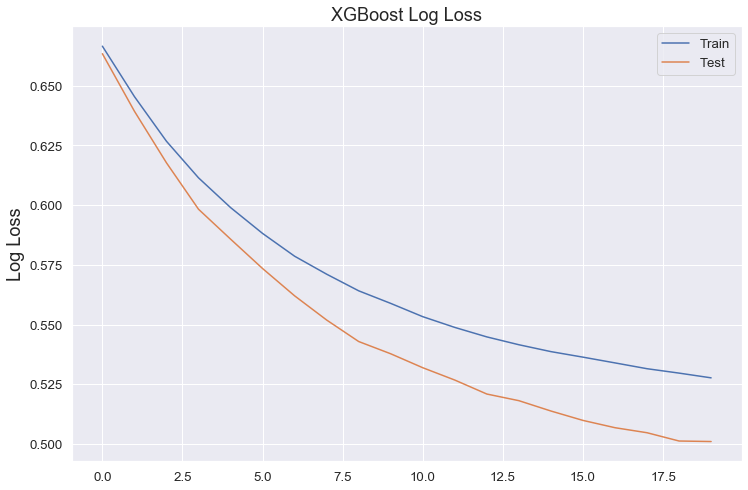

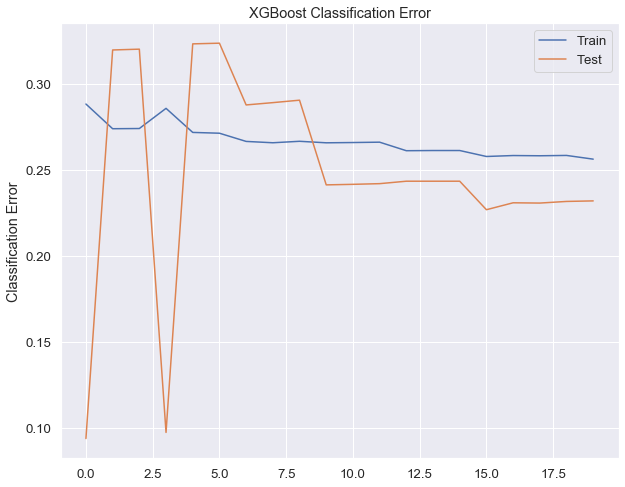

In [2846]:
eval_set = [(X_train_dummy, y_train), (X_test_dummy, y_test)]
xgb.fit(X_train_dummy, y_train, eval_metric=["error","logloss"], eval_set=eval_set, verbose=False)
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss',fontsize=18)
plt.title('XGBoost Log Loss',fontsize=18)
plt.show()


# plot classification error
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.rc('font', size=15)
plt.show()

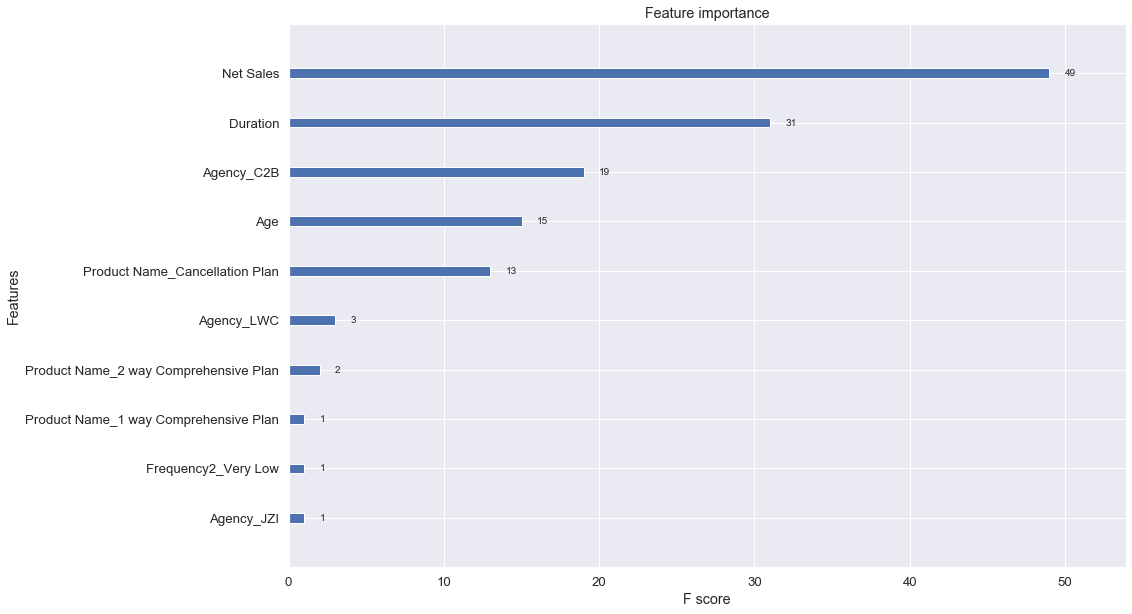

In [3239]:
fig, ax = plt.subplots(figsize=(15,10))
plot_importance(xgb, max_num_features=10, ax=ax)

In [2848]:
roc_auc_score(y_test, pred_xgb)

0.7633850992401731

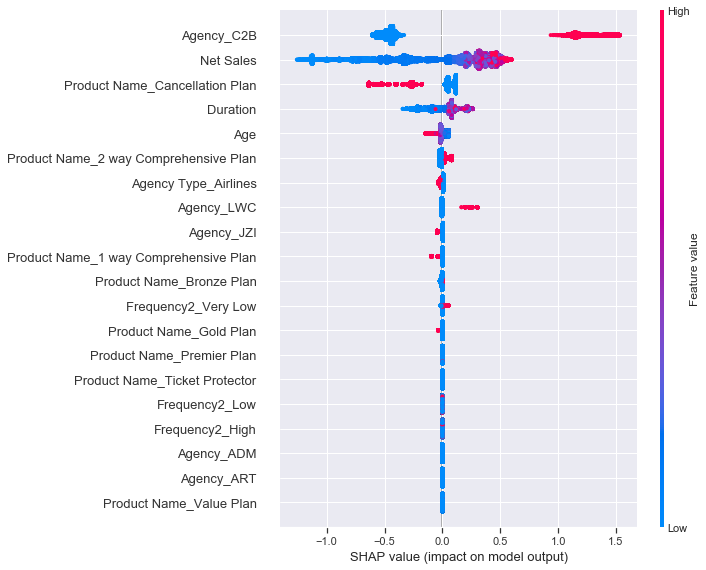

In [3238]:
import shap
shap_value = shap.TreeExplainer(xgb, model_output=log_loss).shap_values(X_train_dummy)
shap.summary_plot(shap_value, X_train_dummy)

## Light Gradient Boost

In [2949]:
import lightgbm
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 3

In [2850]:
d_train = lgb.Dataset(X_train_dummy, label=y_train)

In [2851]:
lgb = lgb.train(params, d_train, 80)

In [2852]:
pred_lgb = lgb.predict(X_test_dummy)

for i in range(len(pred_lgb)):
    if pred_lgb[i]>=.5:
       pred_lgb[i]=1
    else:  
       pred_lgb[i]=0

In [2995]:
pred_lgb_proba = lgb.predict(X_test_dummy)
pred_lgb_proba

array([0.63608017, 0.42803278, 0.35677047, ..., 0.66161385, 0.66816488,
       0.61544573])

In [2853]:
print(classification_report(y_test, pred_lgb))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95     12521
           1       0.06      0.54      0.11       145

    accuracy                           0.90     12666
   macro avg       0.53      0.72      0.53     12666
weighted avg       0.98      0.90      0.94     12666



In [2854]:
roc_auc_score(y_test, pred_lgb)

0.7228171155217854

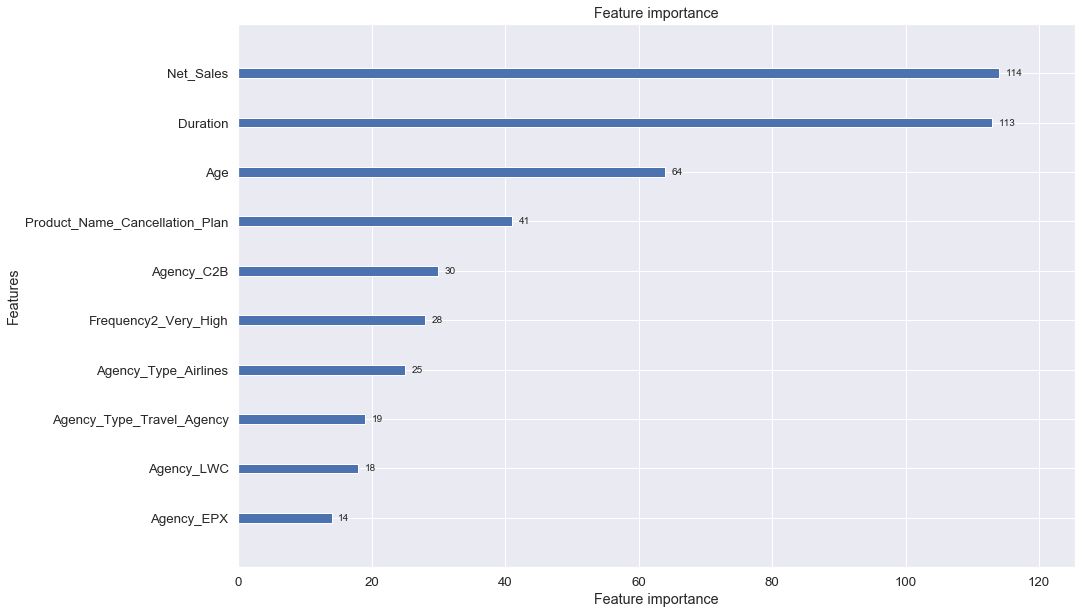

In [2951]:
lightgbm.plot_importance(lgb, max_num_features=10, figsize=(15,10))
plt.show()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


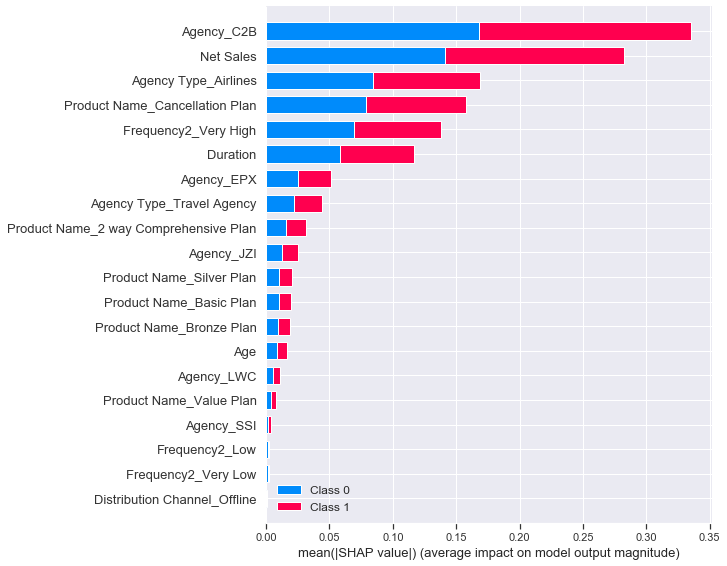

In [3241]:
shap_value = shap.TreeExplainer(lgb).shap_values(X_train_dummy)
shap.summary_plot(shap_value, X_train_dummy)

## Naive Bayes

In [2855]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train_dummy, y_train)

In [2861]:
pred_nb = nb.predict(X_test_dummy)
pred_nb_proba = nb.predict_proba(X_test_dummy)
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67     12521
           1       0.02      0.88      0.04       145

    accuracy                           0.51     12666
   macro avg       0.51      0.69      0.36     12666
weighted avg       0.99      0.51      0.66     12666



In [2857]:
confusion_matrix(y_test, pred_nb, labels=[1, 0])

array([[ 128,   17],
       [6198, 6323]])

In [2858]:
roc_auc_score(y_test, pred_nb)

0.6938751173889934

In [2969]:
nb.class_prior_

array([0.52669352, 0.47330648])

## NN

In [3111]:
from tensorflow import keras
from keras.layers import Dropout

In [2999]:
tf.__version__

'2.1.0'

In [3000]:
X_train_dummy.shape

(81930, 43)

In [3085]:
nn = keras.Sequential(
    [
        keras.layers.Dense(26, input_dim=43, activation='relu'),
                keras.layers.Dense(5, activation='relu'),
                keras.layers.Dropout(0.3),
                keras.layers.Dense(5, activation='relu'),
                keras.layers.Dropout(0.3),
                keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [3086]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

In [3003]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7859716402973505202
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11965159455972530743
physical_device_desc: "device: XLA_CPU device"
]


In [545]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3008]:
nn.fit(X_train_dummy, y_train, epochs=150, batch_size=100, verbose=False)

In [3036]:
pred_nn = nn.predict_classes(X_test_dummy)
pred_nn_proba = nn.predict_proba(X_test_dummy)

In [3037]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     12521
           1       0.04      0.63      0.08       145

    accuracy                           0.83     12666
   macro avg       0.52      0.73      0.49     12666
weighted avg       0.98      0.83      0.89     12666



In [3038]:
confusion_matrix(y_test, pred_nn, labels=[1,0])

array([[   91,    54],
       [ 2161, 10360]])

In [3040]:
accuracy_score = accuracy_score(y_test, pred_nn)

In [3061]:
X_train_dummy.shape

(81930, 43)

In [3090]:
X_nn=X_train_dummy.values

In [3114]:
def create_model():
    model = Sequential()
    model.add(Dense(26, input_dim=43, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

In [3115]:
import eli5
from eli5.sklearn import PermutationImportance
from keras.wrappers.scikit_learn import KerasClassifier

nn2 = KerasClassifier(build_fn=create_model)
nn2.fit(X_train_dummy, y_train, epochs=150, batch_size=100, verbose=False)
perm = PermutationImportance(nn2).fit(X_train_dummy, y_train)
eli5.show_weights(perm, feature_names = X_train_dummy.columns.tolist())

81930/81930 [==============================] - 1s 18us/step


Weight,Feature
0.1332 ± 0.0025,Net Sales
0.0894 ± 0.0014,Duration
0.0831 ± 0.0027,Agency_C2B
0.0609 ± 0.0012,Age
0.0423 ± 0.0007,Product Name_Cancellation Plan
0.0342 ± 0.0016,Agency Type_Airlines
0.0299 ± 0.0008,Product Name_Bronze Plan
0.0288 ± 0.0018,Frequency2_Very High
0.0261 ± 0.0010,Frequency2_High
0.0254 ± 0.0011,Agency_EPX


In [3117]:
pred_nn2 = nn2.predict(X_test_dummy)
pred_nn2_proba = nn2.predict_proba(X_test_dummy)

In [3119]:
print(classification_report(y_test, pred_nn2,))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     12521
           1       0.03      0.77      0.06       145

    accuracy                           0.70     12666
   macro avg       0.51      0.73      0.44     12666
weighted avg       0.99      0.70      0.81     12666



In [ ]:
roc

In [ ]:
def get_model():
    # Create a simple model.
    inputs = keras.Input(shape=(32,))
    outputs = keras.layers.Dense(1)(inputs)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

In [3011]:
lr_accuracy = accuracy_score(y_test, pred_lr)
xgb_accuracy = accuracy_score(y_test, pred_xgb)
lgb_accuracy = accuracy_score(y_test, pred_lgb)
nb_accuracy = accuracy_score(y_test, pred_nb)
nn_accuracy = accuracy_score(y_test, pred_nn)

lr_precision = precision_score(y_test, pred_lr)
xgb_precision = precision_score(y_test, pred_xgb)
lgb_precision = precision_score(y_test, pred_lgb)
nb_precision = precision_score(y_test, pred_nb)
nn_precision = precision_score(y_test, pred_nn)

lr_recall = recall_score(y_test, pred_lr)
xgb_recall = recall_score(y_test, pred_xgb)
lgb_recall = recall_score(y_test, pred_lgb)
nb_recall = recall_score(y_test, pred_nb)
nn_recall = recall_score(y_test, pred_nn)

lr_f1 = f1_score(y_test, pred_lr)
xgb_f1 = f1_score(y_test, pred_xgb)
lgb_f1 = f1_score(y_test, pred_lgb)
nb_f1 = f1_score(y_test, pred_nb)
nn_f1 = f1_score(y_test, pred_nn)

lr_roc = roc_auc_score(y_test, pred_lr)
xgb_roc = roc_auc_score(y_test, pred_xgb)
lgb_roc = roc_auc_score(y_test, pred_lgb)
nb_roc = roc_auc_score(y_test, pred_nb)
nn_roc = roc_auc_score(y_test, pred_nn)


result = {'Model': ['Logistic Regression', 'XGBoost', 'Light Gradient Boost', 'Naive Bayes','Neural Network'],
          'Accuracy' : [lr_accuracy, xgb_accuracy, lgb_accuracy, nb_accuracy, nn_accuracy],
          'Precision' : [lr_precision, xgb_precision, lgb_precision, nb_precision, nn_precision],
          'Recall' : [lr_recall, xgb_recall, lgb_recall, nb_recall, nn_recall],
          'F1' : [lr_f1, xgb_f1, lgb_f1, nb_f1, nn_f1],
          'ROC-AUC' : [lr_roc, xgb_roc, lgb_roc, nb_roc, nn_roc]}


result_df = pd.DataFrame(data = result)
result_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.794331,0.038635,0.710345,0.073284,0.752824
1,XGBoost,0.768040,0.036508,0.758621,0.069664,0.763385
2,Light Gradient Boost,0.896731,0.059803,0.544828,0.107776,0.722817
3,Naive Bayes,0.509316,0.020234,0.882759,0.039561,0.693875
4,Neural Network,0.825122,0.040409,0.627586,0.075928,0.727498


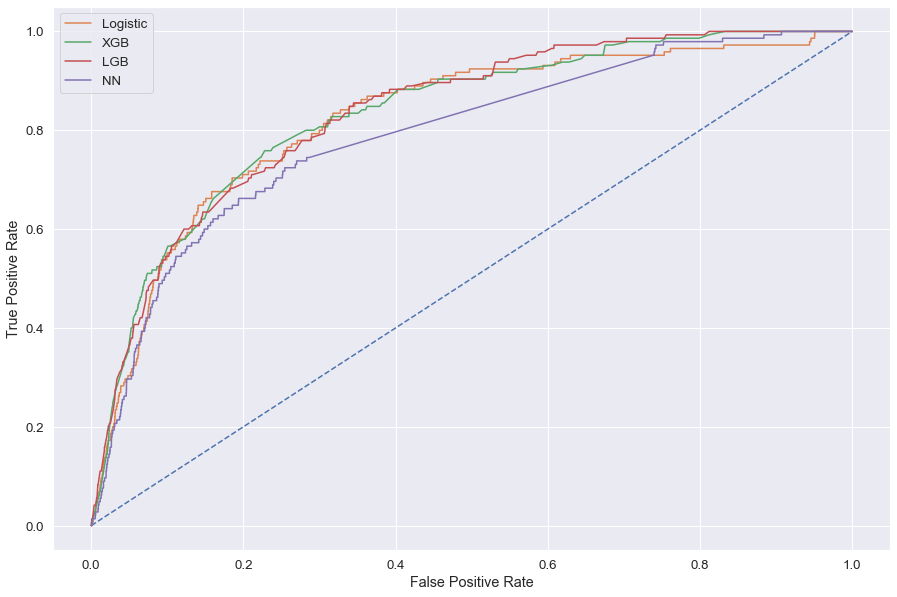

In [3013]:
# calc fp, tp, threshold with roc_curve package
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, pred_lr_proba)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, pred_xgb_proba)
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, pred_lgb_proba)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, pred_nn_proba)

plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr_lr, tpr_lr, marker='', label='Logistic')
plt.plot(fpr_xgb, tpr_xgb, marker='', label='XGB')
plt.plot(fpr_lgb, tpr_lgb, marker='', label='LGB')
plt.plot(fpr_nn, tpr_nn, marker='', label='NN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### find out the best threshold in terms of Specificity (1-fpr) and Sensitivity (tpr)

In [ ]:
# since we are dealing with percentage, we use geometric mean
from numpy import sqrt, argmax
gmeans = list(map(lambda x, y: sqrt(x * (1-y)), tpr, fpr))

In [2916]:
# return the index of maximum value
best_thresh_index = argmax(gmeans)
best_thresh_lr = thresholds[best_thresh_index]

## Check Calibration Curve - Brier Score

In [3129]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [3133]:
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train_dummy, y_train)
        y_pred = clf.predict(X_test_dummy)
        if hasattr(clf, "predict_proba"):
            prob_pos = np.where(clf.predict_proba(X_test_dummy)[:, 1] > 0.8, 1,0)
        else:  # use decision function
            prob_pos = clf.decision_function(X_test_dummy)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

/Users/naitochieri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic:
	Brier: 0.060
	Precision: 0.042
	Recall: 0.690
	F1: 0.080

XGB:
	Brier: 0.032
	Precision: 0.037
	Recall: 0.759
	F1: 0.070

XGB + Isotonic:
	Brier: 0.063
	Precision: 0.038
	Recall: 0.731
	F1: 0.072

XGB + Sigmoid:
	Brier: 0.076
	Precision: 0.037
	Recall: 0.745
	F1: 0.070



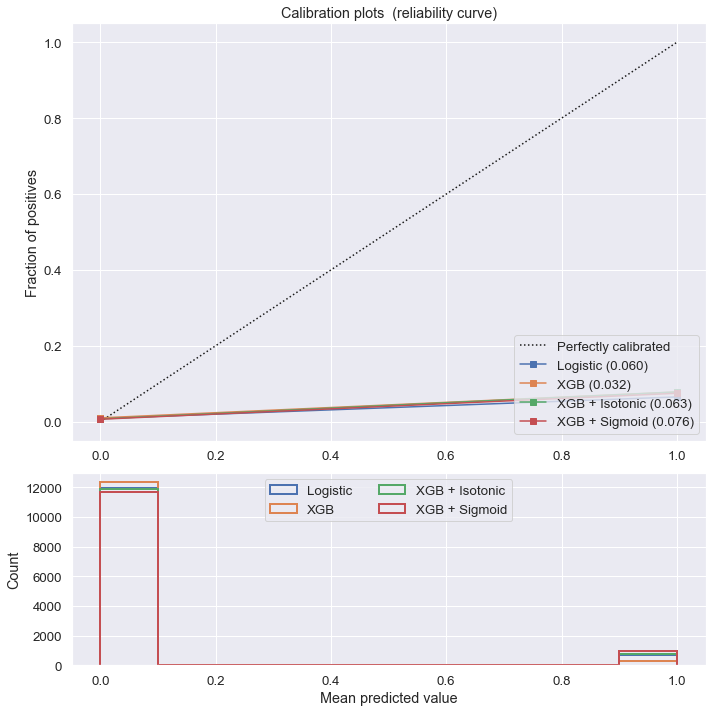

In [3134]:
plot_calibration_curve(xgb, "XGB", 1)

/Users/naitochieri/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


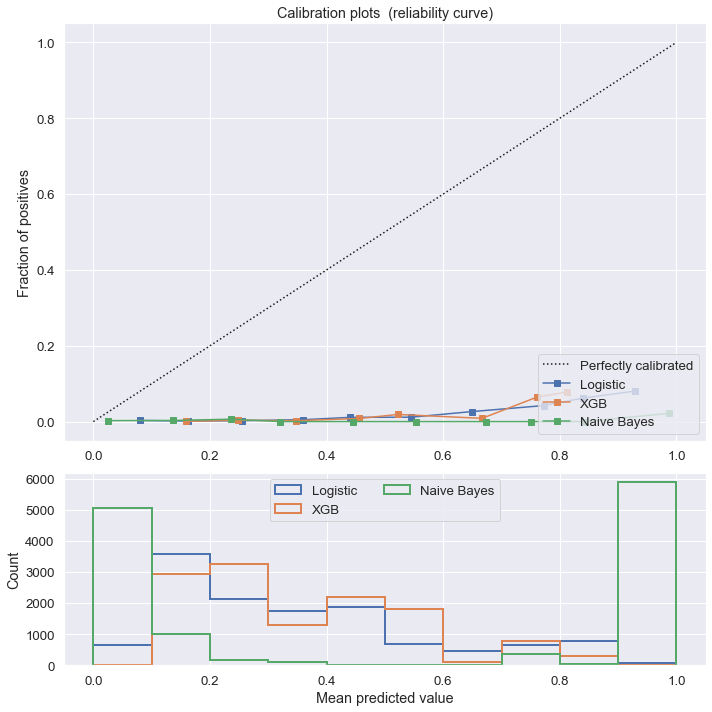

In [3126]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (xgb, 'XGB'),
                  (nb, 'Naive Bayes')]:
    clf.fit(X_train_dummy, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test_dummy)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test_dummy)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()